In [1]:
import pandas as pd

df = pd.read_csv('rotation_experiment_results.csv')

In [2]:
df_sorted = df.sort_values(by='rotation')
print(df_sorted)

    rotation       cce       ece  test_acc
1          0  0.049361  0.087345  0.994407
0         15  0.056037  0.084204  0.979315
11        30  0.118994  0.048264  0.878755
3         45  0.263827  0.091255  0.652883
6         60  0.393157  0.269233  0.407123
4         75  0.450018  0.383061  0.255227
8         90  0.502597  0.464972  0.205682
10       105  0.537747  0.482582  0.211030
2        120  0.520503  0.452377  0.257120
12       135  0.478189  0.406617  0.319476
13       150  0.472137  0.386012  0.366310
5        165  0.476534  0.389291  0.390743
9        180  0.483095  0.395773  0.408680
15       195  0.467672  0.362183  0.410782
14       210  0.476005  0.367237  0.375090
7        225  0.496440  0.405018  0.298748


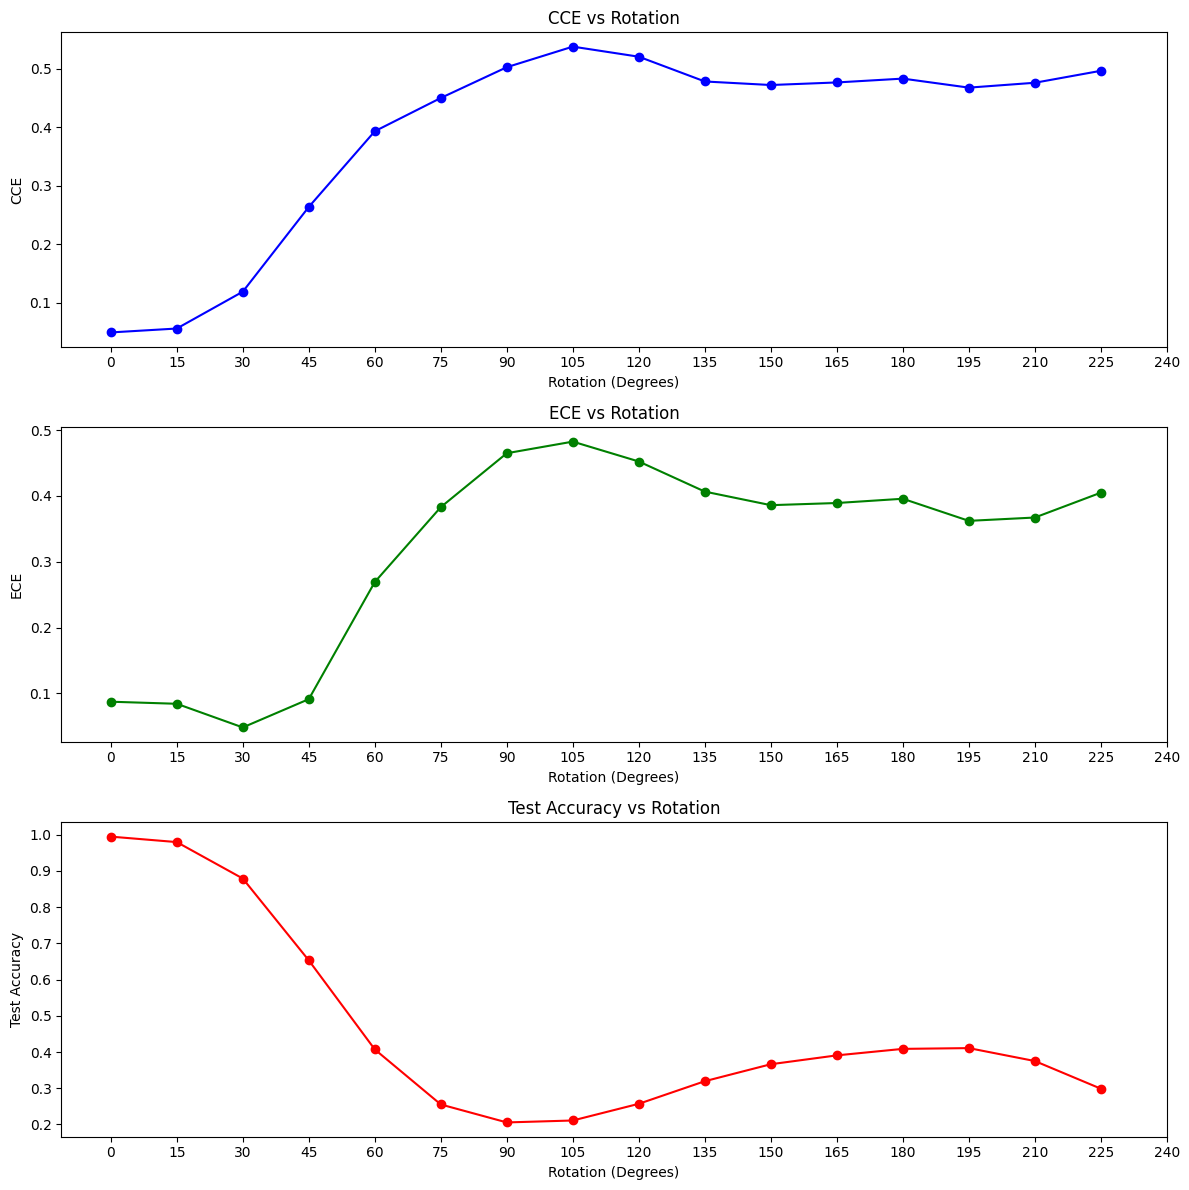

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Plot cce values
axs[0].plot(df_sorted['rotation'], df_sorted['cce'], marker='o', color='blue')
axs[0].set_title('CCE vs Rotation')
axs[0].set_xlabel('Rotation (Degrees)')
axs[0].set_ylabel('CCE')
axs[0].set_xticks(range(0, 241, 15))

# Plot ece values
axs[1].plot(df_sorted['rotation'], df_sorted['ece'], marker='o', color='green')
axs[1].set_title('ECE vs Rotation')
axs[1].set_xlabel('Rotation (Degrees)')
axs[1].set_ylabel('ECE')
axs[1].set_xticks(range(0, 241, 15))

# Plot test_acc values
axs[2].plot(df_sorted['rotation'], df_sorted['test_acc'], marker='o', color='red')
axs[2].set_title('Test Accuracy vs Rotation')
axs[2].set_xlabel('Rotation (Degrees)')
axs[2].set_ylabel('Test Accuracy')
axs[2].set_xticks(range(0, 241, 15))

plt.tight_layout()
plt.show()
fig.savefig('rotation_graph.png')

   rotation  index  label  cce_value  \
0        15      5      1   0.051828   
1        15     10      0   0.065655   
2        15     15      5   0.054172   
3        15     20      9   0.030945   
4        15     26      7   0.067645   

                                               image  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  


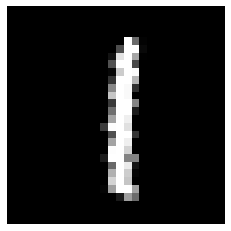

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the CSV file
images_df = pd.read_csv('cce_images/kronecker/rotation/selected_images.csv')

# Display the first few rows of the dataframe
print(images_df.head())

image = images_df['image'].iloc[0]
image = eval(image)  # Convert the string representation of the list back to a list

plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

In [20]:
unique_indices = images_df['index'].unique()
print(unique_indices)

[ 5 10 15 20 26]


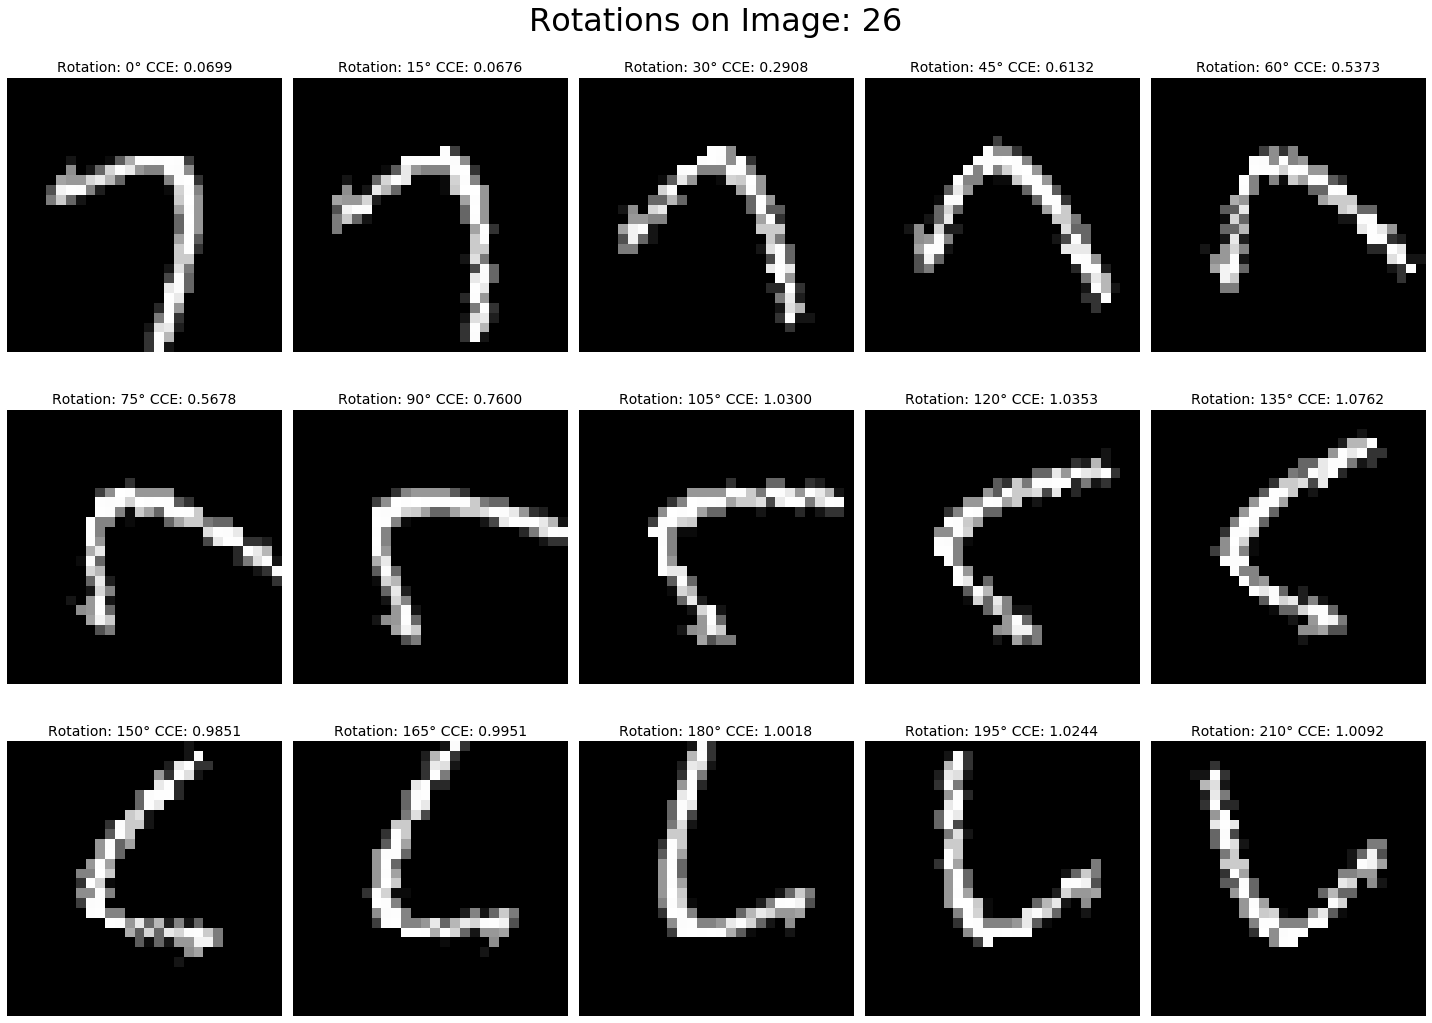

In [21]:
# Filter the dataframe where 'index' = 5 and order by 'rotation'
filtered_images_df = images_df[images_df['index'] == 26].sort_values(by='rotation')

# Display the images in a 3x5 grid
fig, axs = plt.subplots(3, 5, figsize=(20, 15))

for ax, (index, row) in zip(axs.flatten(), filtered_images_df.iterrows()):
    image = eval(row['image'])  # Convert the string representation of the list back to a list
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Rotation: {row['rotation']}° CCE: {row['cce_value']:.4f}", fontsize=14)
    ax.axis('off')  # Hide the axis

fig.suptitle(f"Rotations on Image: {row['index']}", fontsize=32)  # Add a title to the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()
fig.savefig(f"rotated_img_{row['index']}.png", facecolor='white', edgecolor='white')